# LENDING CLUB CASE STUDY
------
### Problem Statement:

To understand risk analytics in banking and financial services to minimise the risk of losing money while lending to customers.

Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The company which provided the data wants to understand the driving factors behind loan default, i.e. the variables which are strong indicators of default so that the company can utilise this knowledge for its portfolio and risk assessment. 

We will use Exploratory Data Analysis(EDA) to understand how consumer attributes and loan attributes influence the tendency of default. 


In [1]:
# Importing the Basic Packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the CSV file and checking for any header rows

loan_data = pd.read_csv('loan.csv',low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 1. Data Cleaning

#### Data Cleaning Steps:
- 1.1 Removing any header, footer or summary rows
- 1.2 Removing unnecessary or duplicated columns and rows
- 1.3 Null Value treatment
- 1.4 Data Type Conversion
- 1.5 Resolving Data formatting issues
- 1.6 Describing DataSet
- 1.7 Checking for outliers in data

### 1.1 Removing Header, Footer and Summary rows if any

In [3]:
# Checking for any extra header rows:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Checking for any footer/summary rows:

loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# It is observed from above that no header or footer rows are present to be removed.
loan_data.shape

(39717, 111)

### 1.2 Removing unnecessary or duplicated columns and rows

In [6]:
# From an intial scanning of the CSV file, it was observed that many columns have only null values.
# Lets confirm it using the below code and remove these columns from the dataset as these are of no
# importance to the EDA process.

loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# As we can see many columns have only null values. Lets check how many such columns are present.

null_columns = list(loan_data.columns[loan_data.isna().all()])
len(null_columns)

54

In [8]:
# There are 54 such columns. We will drop these columns from the dataset.

loan_data = loan_data.drop(null_columns, axis=1)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
loan_data.shape

(39717, 57)

In [10]:
# Next we will check for column values counts.

loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [11]:
# From above, we see that some columns have only 1 unique value and we need to remove them.

for column in loan_data.columns:
    if loan_data[column].nunique(dropna=True) == 1:
        loan_data = loan_data.drop(column, axis=1)
    else:
        pass
loan_data.nunique().sort_values()

next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

In [12]:
# Also we can observe 3 columns with all unique values. URL, Member_id and id. We can drop these as it does not contribute
# to the analysis

loan_data = loan_data.drop(['url','member_id','id'], axis = 1)
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [13]:
loan_data.shape

(39717, 45)

We are now left with 45 columns. Out of which, we can remove columns with no relevance to the problem statement.

Most of the below mentioned are relevant only after the loan is approved and it does not contribute to defaulter characteristcs.

The below are the columns needed to be reomved for having a cleaner dataset:
- sub_grade
- emp_title
- desc
- title
- zip_code
- earliest_cr_line
- mths_since_last_delinq
- mths_since_last_record
- revol_bal
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- last_credit_pull_d
- total_rec_prncp
- total_rec_int
- pub_rec
- open_acc
- inq_last_6mths

In [14]:
# initializing unnecessary columns

del_columns = ['sub_grade','emp_title','desc','title','zip_code','earliest_cr_line','inq_last_6mths',
               'mths_since_last_delinq','mths_since_last_record','revol_bal','pub_rec','open_acc',
               'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_late_fee',
               'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d',
               'last_credit_pull_d','total_rec_prncp','total_rec_int']

# dropping unnecessary columns

loan_data = loan_data.drop(del_columns, axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,83.70%,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,9.40%,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,98.50%,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,21%,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,53.90%,0.0


In [15]:
# checking shape

loan_data.shape

(39717, 19)

In [16]:
# checking for any rows with all null values

loan_data.isnull().all(axis=1).sum()

0

In [17]:
# Checking for any unwanted rows.

loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [18]:
# since the problem statement is checking attributes contributing to defaulting, we do not require rows with 
# loan_status='Current'.

loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]
loan_data.shape

(38577, 19)

In [19]:
# Checking for duplicates:

loan_data.duplicated().sum()

0

### 1.3 Null Value treatment

In [20]:
loan_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [21]:
 print(round((loan_data.isnull().sum()/len(loan_data)*100),2))

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64


In [22]:
# Since the percentage of null values are negeligible, we can remove the rows with null values for the above columns.

loan_data.dropna(inplace = True)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,83.70%,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,9.40%,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,98.50%,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,21%,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,28.30%,0.0


In [23]:
# Pecentage of deleted rows
total_rows = 39717
rows_deleted= round(((total_rows- len(loan_data))*100)/total_rows,2)

print('Percentage of deleted rows = ',rows_deleted)

Percentage of deleted rows =  7.34


In [24]:
loan_data.shape

(36800, 19)

### 1.4 Data Type Conversion

In [25]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt           36800 non-null  int64  
 2   funded_amnt_inv       36800 non-null  float64
 3   term                  36800 non-null  object 
 4   int_rate              36800 non-null  object 
 5   installment           36800 non-null  float64
 6   grade                 36800 non-null  object 
 7   emp_length            36800 non-null  object 
 8   home_ownership        36800 non-null  object 
 9   annual_inc            36800 non-null  float64
 10  verification_status   36800 non-null  object 
 11  issue_d               36800 non-null  object 
 12  loan_status           36800 non-null  object 
 13  purpose               36800 non-null  object 
 14  addr_state            36800 non-null  object 
 15  dti                

In [26]:
# From the above, notice that the datatype of issue_d is object. We need to convert it to datetime datatype.

loan_data['issue_d']= pd.to_datetime(loan_data['issue_d'],format='%b-%y')
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36800 non-null  int64         
 1   funded_amnt           36800 non-null  int64         
 2   funded_amnt_inv       36800 non-null  float64       
 3   term                  36800 non-null  object        
 4   int_rate              36800 non-null  object        
 5   installment           36800 non-null  float64       
 6   grade                 36800 non-null  object        
 7   emp_length            36800 non-null  object        
 8   home_ownership        36800 non-null  object        
 9   annual_inc            36800 non-null  float64       
 10  verification_status   36800 non-null  object        
 11  issue_d               36800 non-null  datetime64[ns]
 12  loan_status           36800 non-null  object        
 13  purpose         

### 1.5 Resolving Data formatting issues

In [27]:
loan_data.head(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,83.70%,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,9.40%,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,98.50%,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,21%,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,28.30%,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,85.60%,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,CA,5.35,0,87.50%,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,0,32.60%,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,0,36.50%,0.0
10,6500,6500,6500.0,60 months,14.65%,153.45,C,5 years,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,AZ,16.12,0,20.60%,0.0


In [28]:
# Convert 'int_rate' & 'revol_util' to numerical variable

loan_data['int_rate']=loan_data['int_rate'].str.strip('%').astype(float)
loan_data['revol_util']=loan_data['revol_util'].str.strip('%').astype(float)


In [29]:
# We will round off few variables for ease of analysis.

loan_data[['funded_amnt_inv','annual_inc','int_rate','dti']] = np.round(loan_data[['funded_amnt_inv','annual_inc','int_rate', 'dti']],1).astype(int)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27,0,83.7,0.0
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1,0,9.4,0.0
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,small_business,IL,8,0,98.5,0.0
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20,0,21.0,0.0
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11,0,28.3,0.0


In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36800 non-null  int64         
 1   funded_amnt           36800 non-null  int64         
 2   funded_amnt_inv       36800 non-null  int32         
 3   term                  36800 non-null  object        
 4   int_rate              36800 non-null  int32         
 5   installment           36800 non-null  float64       
 6   grade                 36800 non-null  object        
 7   emp_length            36800 non-null  object        
 8   home_ownership        36800 non-null  object        
 9   annual_inc            36800 non-null  int32         
 10  verification_status   36800 non-null  object        
 11  issue_d               36800 non-null  datetime64[ns]
 12  loan_status           36800 non-null  object        
 13  purpose         

### 1.6 Descibing the Data

In [31]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
count,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,3.680000e+04,36800.000000,36800.000000,36800.000000,36800.000000
mean,11149.540761,10880.794837,10438.979293,11.536386,324.906537,6.943448e+04,12.887772,0.146141,48.992830,0.041821
std,7369.855703,7109.157574,7008.500774,3.740529,208.891979,6.402159e+04,6.647459,0.491844,28.313209,0.200859
min,500.000000,500.000000,0.000000,5.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,8.000000,167.730000,4.113300e+04,8.000000,0.000000,25.600000,0.000000
50%,10000.000000,9600.000000,9000.000000,11.000000,280.110000,6.000000e+04,13.000000,0.000000,49.500000,0.000000
75%,15000.000000,15000.000000,14350.000000,14.000000,429.365000,8.300000e+04,18.000000,0.000000,72.500000,0.000000
max,35000.000000,35000.000000,35000.000000,24.000000,1305.190000,6.000000e+06,30.000000,11.000000,99.900000,2.000000


### 1.7 Checking for outliers in data

0.50     60000.00
0.75     83000.00
0.90    116738.90
0.93    129700.00
0.94    135000.00
0.95    142000.00
0.97    165996.12
0.98    188023.92
0.99    235000.00
Name: annual_inc, dtype: float64


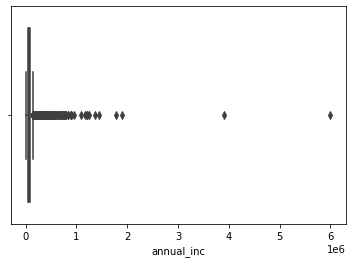

In [32]:
# One of the possible columns having outlier would be 'annual_inc'. Lets check if this is true using quantile() & boxplot

sns.boxplot(loan_data['annual_inc'])
quant_annual_inc = loan_data.annual_inc.quantile([0.5, 0.75,0.90,0.93, 0.94, 0.95, 0.97,0.98, 0.99])
print(quant_annual_inc)

In [33]:
# As it can be observed from plot & quantile informartion,annual_inc is increasing greatly
# after the 93th percentile. Hence we can remove values greater than 93th percentile.

quant_93 = loan_data['annual_inc'].quantile(0.93)
loan_data = loan_data[loan_data.annual_inc <= quant_93]
loan_data.shape

(34225, 19)

0.50     56000.00
0.75     75996.00
0.90     98000.00
0.93    104220.04
0.94    107000.00
0.95    110000.00
0.97    118000.00
0.98    120000.00
0.99    124800.00
Name: annual_inc, dtype: float64


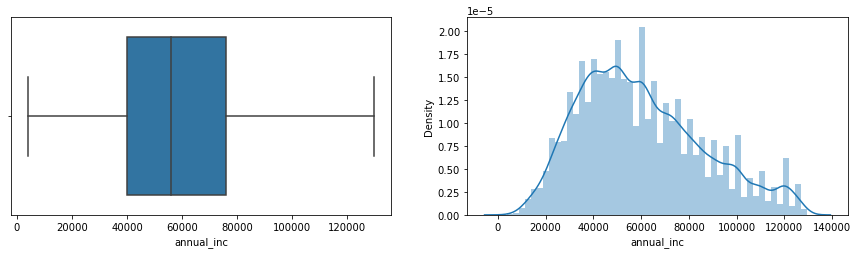

In [34]:
quant_annual_inc = loan_data.annual_inc.quantile([0.5, 0.75,0.90,0.93, 0.94, 0.95, 0.97,0.98, 0.99])
print(quant_annual_inc)

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(loan_data.annual_inc)
plt.subplot(2,2,2)
sns.distplot(loan_data['annual_inc'])
plt.show()
# Now the data looks continuous and normally distributed.

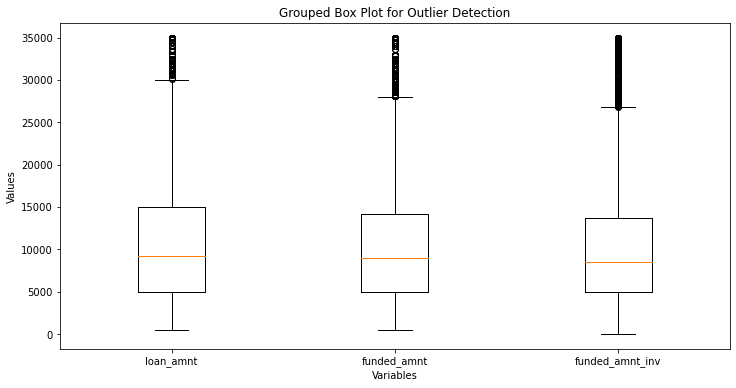

In [35]:
# Let's analyze other numerical variables which could possibly have outliers.
# Selecting columns for the box plot
selected_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']

# Create a grouped box plot for the selected columns
plt.figure(figsize = (12,6))
plt.boxplot([loan_data[col] for col in selected_columns], labels=selected_columns)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Grouped Box Plot for Outlier Detection')

# Show the plot
plt.show()

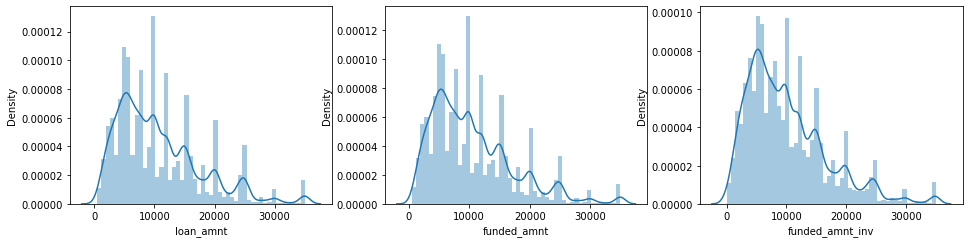

In [36]:
# Let's analyze other numerical variables which could possibly have outliers.
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.distplot(loan_data['loan_amnt'])
plt.subplot(2,3,2)
sns.distplot(loan_data['funded_amnt'])
plt.subplot(2,3,3)
sns.distplot(loan_data['funded_amnt_inv'])
plt.show()

In [37]:
# Since the distributions look continuous, we will keep it as is.

## 2. Univariate Analysis

### 2.1 Unordered Catagorical Variables

Fully Paid     85.0
Charged Off    15.0
Name: loan_status, dtype: float64 1
-------------------------------------


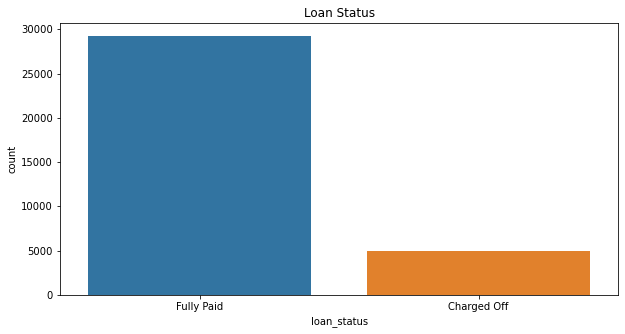

In [38]:
# Firstly, lets analyze the most important target column 'loan_status'

#Finding the percentage count of values in the column.
print(round(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count()),1)
print('-------------------------------------')

# Plotting the target column
plt.figure(figsize=(10,5))
ax = sns.countplot(data =loan_data,x='loan_status')
ax.set_title('Loan Status')
plt.show()

**Observations:** It can be observed from the above that 85% of the applicants have paid off the loan whereas 15% have defaulted

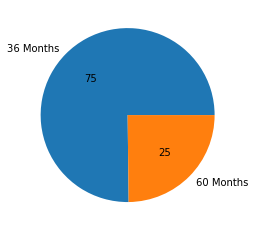

In [39]:
# Analysis on 'term'
plt.pie(loan_data['term'].value_counts(), labels=['36 Months','60 Months'],autopct='%.0f')
plt.show()

**Observations:** This indicates that 75% of applicants have 36 months to pay back the loan

Not Verified       44.0
Verified           30.0
Source Verified    26.0
Name: verification_status, dtype: float64 1
-------------------------------------


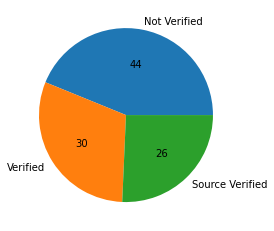

In [40]:
# Analysis on 'Verification Status'
print(round(loan_data.verification_status.value_counts()*100/loan_data.verification_status.count()),1)
print('-------------------------------------')

plt.pie(loan_data['verification_status'].value_counts(), labels = ['Not Verified','Verified','Source Verified'],autopct='%.0f')
plt.show()

**Observations:** It is an interesting inference from the pie plot we see here, 44% of the applicants are not verified before lending the
loan amount. This can be one of the reasons for increasing defaulters.

debt_consolidation    48.0
credit_card           13.0
other                 10.0
home_improvement       7.0
major_purchase         6.0
small_business         4.0
car                    4.0
wedding                2.0
medical                2.0
moving                 1.0
vacation               1.0
house                  1.0
educational            1.0
renewable_energy       0.0
Name: purpose, dtype: float64 1
-------------------------------------


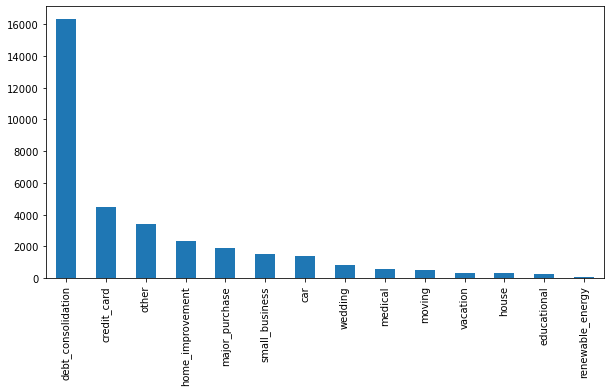

In [41]:
# Analysis on 'purpose'
print(round(loan_data.purpose.value_counts()*100/loan_data.purpose.count()),1)
print('-------------------------------------')

# Plotting the graph
plt.figure(figsize=(10,5))
loan_data['purpose'].value_counts().plot.bar()
plt.show()

**Observations:** It can be observed from the graph that 48% of the applicants have taken the loan for debt consolidation.

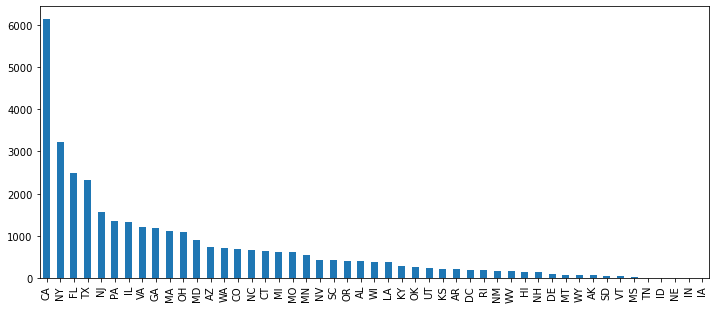

In [42]:
# Analysis on 'addr_state'
# Plotting the graph
plt.figure(figsize=(12,5))
loan_data['addr_state'].value_counts().plot.bar()
plt.show()

**Observations:** California has largest count for loan applicants.

### 2.2 Ordered Categorical Variables

10+ years    22.0
< 1 year     12.0
2 years      12.0
3 years      11.0
4 years       9.0
5 years       9.0
1 year        9.0
6 years       6.0
7 years       5.0
8 years       4.0
9 years       3.0
Name: emp_length, dtype: float64 1
-------------------------------------


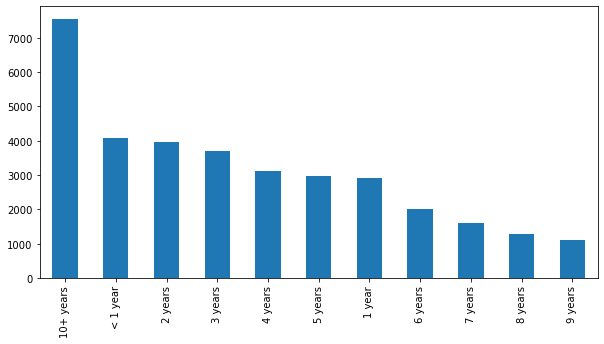

In [43]:
# Analysis on 'emp_length '
print(round(loan_data.emp_length.value_counts()*100/loan_data.emp_length.count()),1)
print('-------------------------------------')

# Plotting the graph
plt.figure(figsize=(10,5))
loan_data['emp_length'].value_counts().plot.bar()
plt.show()

**Observations:** A large majority of the applicants have an employment length of 10+ years however if we combine the percentages of
those less than 3 years is around 44% of the data provided.

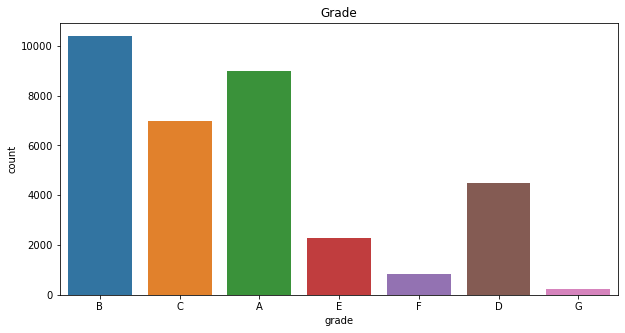

In [44]:
# Distribution for Grades
# Plotting the graph
plt.figure(figsize=(10,5))
ax = sns.countplot(data =loan_data,x='grade')
ax.set_title('Grade')
plt.show()

**Observations:** Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. Generally A corresponds to High Quality while G is of the Least Quality. In the provided data, most of aaplications belong to A, B, C grades.

### 2.3 Quantitative Variables

count    34225.000000
mean        11.478159
std          3.708879
min          5.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         24.000000
Name: int_rate, dtype: float64
----------------------------------


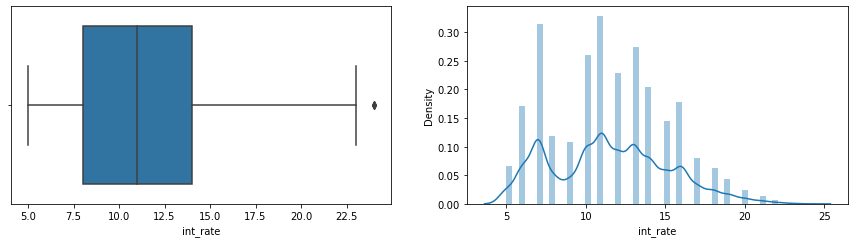

In [45]:
# Analysis on 'int_rate'
print(loan_data['int_rate'].describe())
print('----------------------------------')
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(loan_data.int_rate)
plt.subplot(2,2,2)
sns.distplot(loan_data['int_rate'])
plt.show()

**Observations:** Majority of applicants have received an interest rate between 10% to 15% approximately. 

count    34225.000000
mean     10659.157779
std       6980.194751
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
----------------------------------


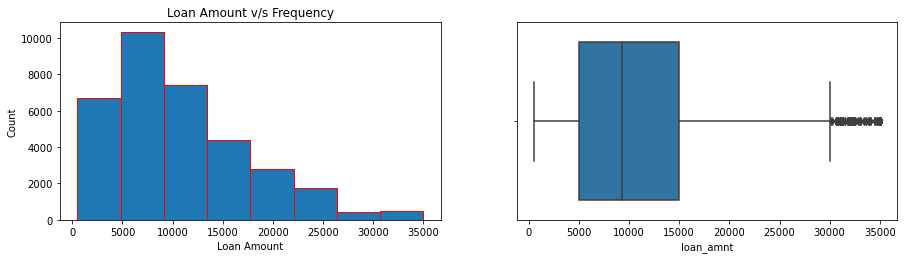

In [46]:
# Analysis on 'loan_amnt'

print(loan_data['loan_amnt'].describe())
print('----------------------------------')
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(loan_data['loan_amnt'],edgecolor="red", bins = 8)
plt.title('Loan Amount v/s Frequency')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.subplot(2,2,2)
sns.boxplot(loan_data.loan_amnt)
plt.show()


**Observations:** Most of the applicants have requested for a loan amount between 6000 to 15000 approximately.

### 2.4 Segmented Univariate Anaylsis

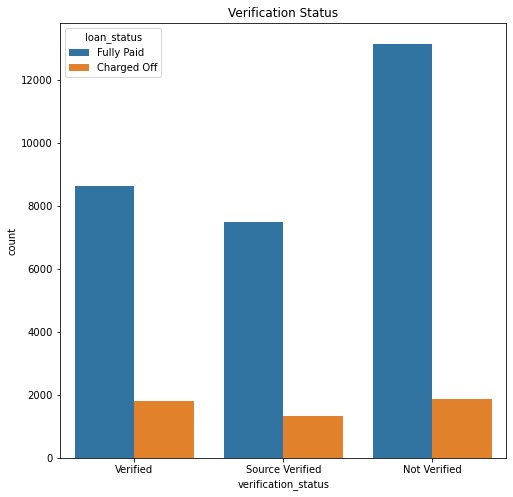

In [47]:
# Verification Status

plt.figure(figsize=(8,8))
ax = sns.countplot(data =loan_data,x='verification_status', hue ='loan_status')
ax.set_title('Verification Status')
plt.show()

**Observation:** Not verified has most defaulters. 

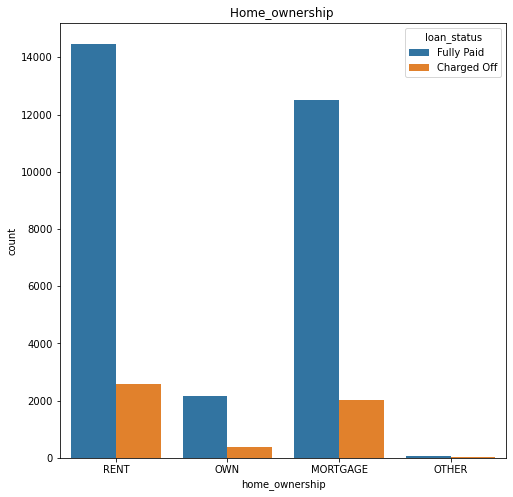

In [48]:
# Home Ownership

plt.figure(figsize=(8,8))
ax = sns.countplot(data =loan_data,x='home_ownership', hue ='loan_status')
ax.set_title('Home_ownership ')
plt.show()

**Observations:** Majority of the defaulters have rented or mortgaged homes.

## 3. Derived Column Analysis

Creating new columns for analysing Interval variable using Steven's Typology

### 3.1 Issue Year

In this section, we will extract the year component from the 'issue_d' column to get the year of issue and perform analysis on the same.

In [49]:
loan_data['issue_year']=pd.DatetimeIndex(loan_data['issue_d']).year
loan_data['issue_month']=pd.DatetimeIndex(loan_data['issue_d']).month
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,2011-12-01,Fully Paid,credit_card,AZ,27,0,83.7,0.0,2011,12
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,2011-12-01,Charged Off,car,GA,1,0,9.4,0.0,2011,12
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,2011-12-01,Fully Paid,small_business,IL,8,0,98.5,0.0,2011,12
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,2011-12-01,Fully Paid,other,CA,20,0,21.0,0.0,2011,12
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,2011-12-01,Fully Paid,wedding,AZ,11,0,28.3,0.0,2011,12


In [50]:
loan_data.issue_year.value_counts()

2011    18341
2010    10459
2009     4387
2008     1031
2007        7
Name: issue_year, dtype: int64

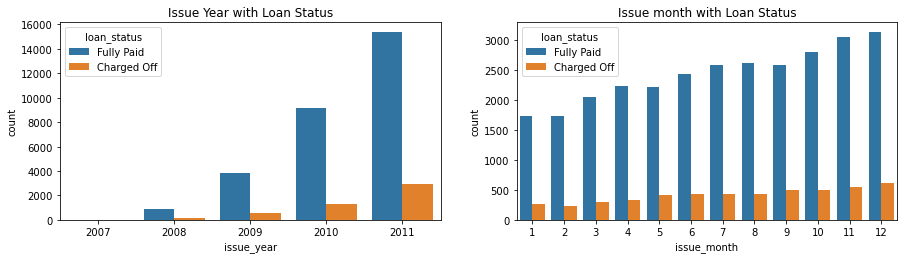

In [51]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax = sns.countplot(data =loan_data,x='issue_year', hue ='loan_status')
ax.set_title('Issue Year with Loan Status')
plt.subplot(2,2,2)
ax = sns.countplot(data =loan_data,x='issue_month', hue ='loan_status')
ax.set_title('Issue month with Loan Status')
plt.show()

**Observations:**   We can infer from the above plot that most of the defaulting have occured in the year 2011. However, the number of loan applicants is also more in 2011. We can obsrve a gradual increase in the applicant count from 2007 t0 2011. Similar is th case for issus month as we observe that most of the issuance have occured in the last few months i.e. October, November, December.

### 3.2 Interest Rate Bucketing

In [52]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low'
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High'

loan_data['int_rate_bin'] = loan_data.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month,int_rate_bin
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,Fully Paid,credit_card,AZ,27,0,83.7,0.0,2011,12,Low
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,Charged Off,car,GA,1,0,9.4,0.0,2011,12,High
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,Fully Paid,small_business,IL,8,0,98.5,0.0,2011,12,Very High
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,Fully Paid,other,CA,20,0,21.0,0.0,2011,12,Moderate
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,Fully Paid,wedding,AZ,11,0,28.3,0.0,2011,12,Very Low


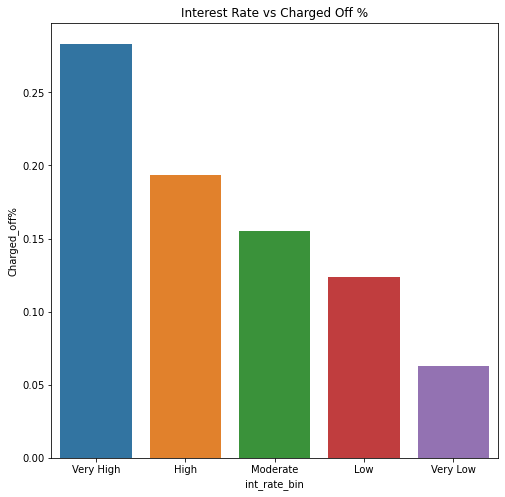

In [53]:
#lets calculate percentage of 'charged off' in the dataframe with respect to these interest rate bins we have created.

int_vs_status = loan_data.groupby(['int_rate_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_vs_status['Total'] = int_vs_status['Charged Off']+ int_vs_status['Fully Paid']
int_vs_status['Charged_off%'] = int_vs_status['Charged Off']/int_vs_status['Total']
int_vs_status = int_vs_status.sort_values('Charged_off%', ascending = False)

plt.figure(figsize=(8,8))
ax = sns.barplot(data =int_vs_status,x='int_rate_bin', y='Charged_off%')
ax.set_title('Interest Rate vs Charged Off %')
plt.show()

**Observations:** It can be observed that defaulters are highest for Very High interest rates. From this we understand that higher interest rates are one of the main reasons for defaulting. 

### 3.3 DTI Buckets

In [54]:
# Bucketing dti
def bucket_dti(column):
    if column <= 5:
        return 'Very Low'
    elif (column >5) and (column <= 10):
        return 'Low'
    elif (column >10) and (column <= 15):
        return 'Moderate'
    elif (column >15) and (column <= 20):
        return 'High'
    else:
        return 'Very High'

loan_data['dti_bin'] = loan_data.apply(lambda x : bucket_dti(x.dti), axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month,int_rate_bin,dti_bin
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,credit_card,AZ,27,0,83.7,0.0,2011,12,Low,Very High
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,car,GA,1,0,9.4,0.0,2011,12,High,Very Low
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,small_business,IL,8,0,98.5,0.0,2011,12,Very High,Low
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,other,CA,20,0,21.0,0.0,2011,12,Moderate,High
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,wedding,AZ,11,0,28.3,0.0,2011,12,Very Low,Moderate


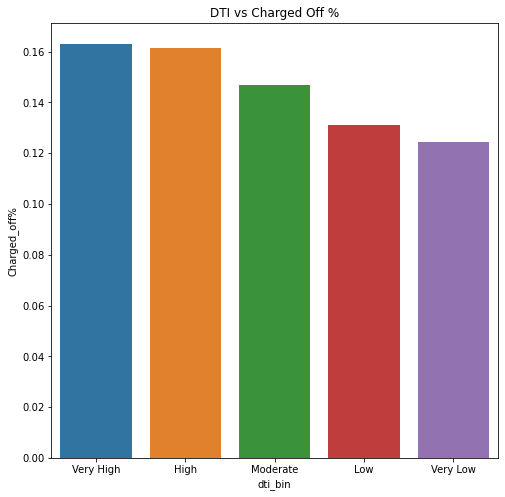

In [55]:
#lets calculate percentage of 'charged off' in the dataframe with respect to dti bins we have created.

status_vs_dti = loan_data.groupby(['dti_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_dti['Total'] = status_vs_dti['Charged Off']+ status_vs_dti['Fully Paid']
status_vs_dti['Charged_off%'] = status_vs_dti['Charged Off']/status_vs_dti['Total']
status_vs_dti = status_vs_dti.sort_values('Charged_off%', ascending = False)

#Ploting the Graph
plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_dti,x='dti_bin', y = 'Charged_off%' )
ax.set_title('DTI vs Charged Off %')
plt.show()

**Observations:** Debt-to-income ratio (DTI) is all monthly debt payments divided by gross monthly income. A general rule of thumb is to keep your overall debt-to-income ratio at or below 43%. However, in this case DTI of defaulters are above moderate. 

### 3.4 Revolving Utilization Rate Bucketing

In [56]:
# Bucketing revol_util
def bucket_revol_util(column):
    if column <= 20:
        return 'Very Low'
    elif (column > 20) and (column <= 40):
        return 'Low'
    elif (column > 40) and (column <= 60):
        return 'Moderate'
    elif (column > 60) and (column <= 80):
        return 'High'
    else:
        return 'Very High'

loan_data['revol_util_bin'] = loan_data.apply(lambda x : bucket_dti(x.revol_util), axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month,int_rate_bin,dti_bin,revol_util_bin
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,AZ,27,0,83.7,0.0,2011,12,Low,Very High,Very High
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,GA,1,0,9.4,0.0,2011,12,High,Very Low,Low
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,IL,8,0,98.5,0.0,2011,12,Very High,Low,Very High
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,CA,20,0,21.0,0.0,2011,12,Moderate,High,Very High
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,AZ,11,0,28.3,0.0,2011,12,Very Low,Moderate,Very High


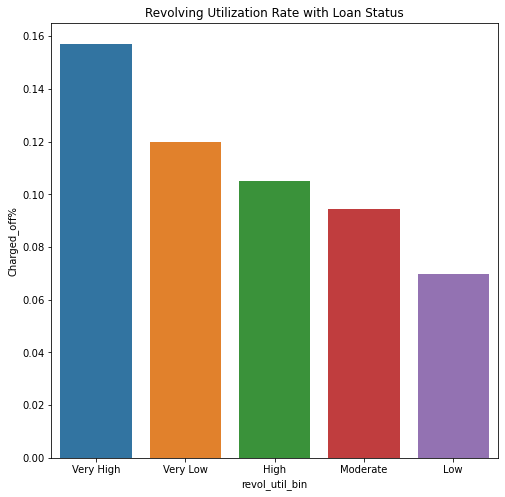

In [57]:
#lets calculate percentage of 'charged off' in the dataframe with respect to dti bins we have created.

status_vs_revol_util = loan_data.groupby(['revol_util_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_revol_util['Total'] = status_vs_revol_util['Charged Off']+ status_vs_revol_util['Fully Paid']
status_vs_revol_util['Charged_off%'] = status_vs_revol_util['Charged Off']/status_vs_revol_util['Total']
status_vs_revol_util = status_vs_revol_util.sort_values('Charged_off%', ascending = False)

#Ploting the Graph

plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_revol_util,x='revol_util_bin', y ='Charged_off%')
ax.set_title('Revolving Utilization Rate with Loan Status')
plt.show()

**Observations:** Revolving utilization rate compares your credit debt to your total credit limit. To calculate it, divide balance by credit limit. From the credit allocated, it is always good to keep this rate below 30% for a good credit score. Here, the utilization
rate is very high. Majority of the defaulter have the Utilization rate of above 80%.

## 4. Bivariate Analysis

In this section, we will analyise the impact of one feature on the other.

In [58]:
# Grade vs Interest Rate Buckets

pd.crosstab(loan_data['grade'], loan_data['int_rate_bin'] )

int_rate_bin,High,Low,Moderate,Very High,Very Low
grade,,,,,
A,0,0,0,0,8970
B,0,7510,1747,0,1138
C,1998,145,4694,154,3
D,2462,1,99,1937,4
E,79,0,1,2208,2
F,2,0,0,825,0
G,0,0,0,246,0


**Observation:** Very high interest rates have low grades. This indicates that the quality of the applications are low for very high interest rate. Defaulting rate is also high for very high interest rates as we have observed earlier.

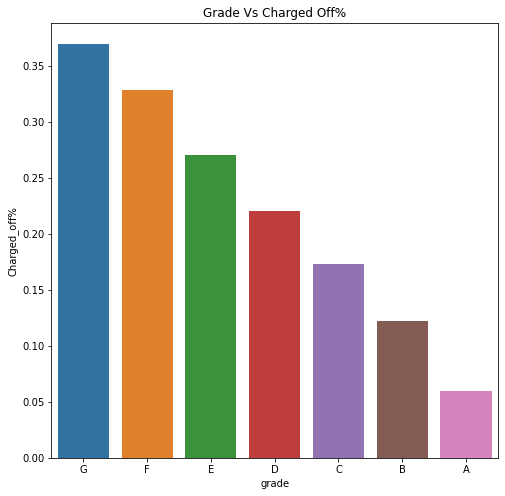

In [59]:
#Grade vs Charged Off %
#lets calculate percentage of 'charged off' in the dataframe with respect to grades.

status_vs_grade = loan_data.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_grade['Total'] = status_vs_grade['Charged Off']+ status_vs_grade['Fully Paid']
status_vs_grade['Charged_off%'] = status_vs_grade['Charged Off']/status_vs_grade['Total']
status_vs_grade = status_vs_grade.sort_values('Charged_off%', ascending = False)

#Ploting the Graph

plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_grade,x='grade', y ='Charged_off%')
ax.set_title('Grade Vs Charged Off%')
plt.show()

**Observation:** This ascertains our previous observation that lower grades have higher defaulting rate.

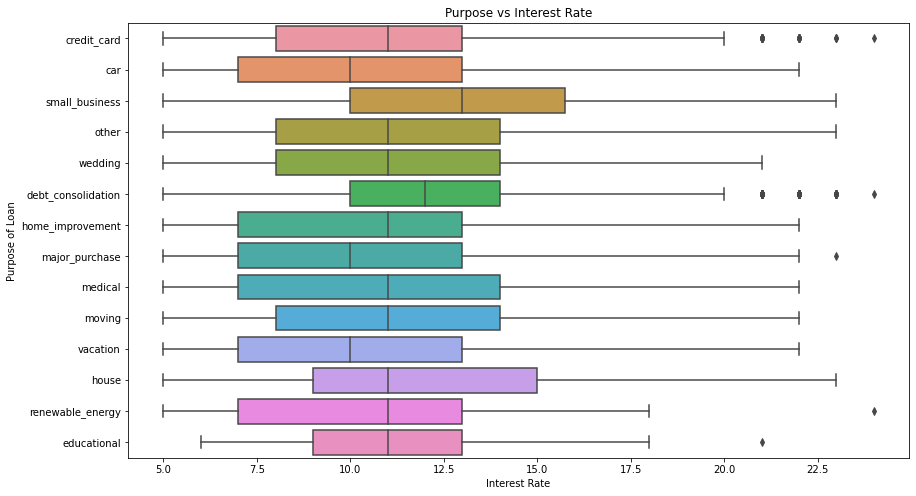

In [60]:
#Purpose vs interest rates
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_data)
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

**Observations:** Small businesses have higher interest rate compared to others.

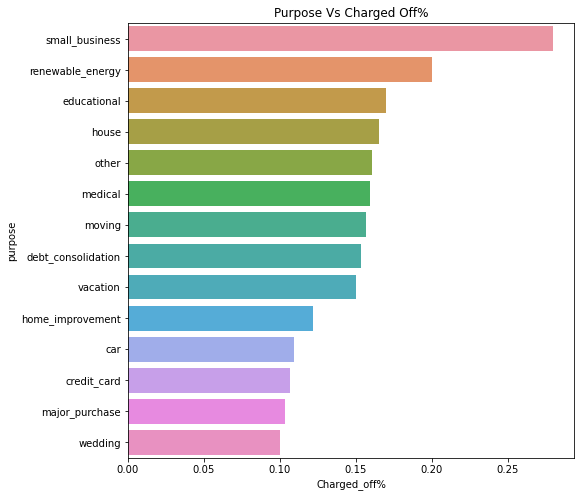

In [61]:
#Purpose vs Charged Off %
#lets calculate percentage of 'charged off' in the dataframe with respect to purpose.

status_vs_purpose = loan_data.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_purpose['Total'] = status_vs_purpose['Charged Off']+ status_vs_purpose['Fully Paid']
status_vs_purpose['Charged_off%'] = status_vs_purpose['Charged Off']/status_vs_purpose['Total']
status_vs_purpose = status_vs_purpose.sort_values('Charged_off%', ascending = False)

#Ploting the Graph

plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_purpose,x='Charged_off%', y ='purpose')
ax.set_title('Purpose Vs Charged Off%')
plt.show()

**Observations:** Highest percentage of defaulters belong to small business category followed by renewable energy. As we have already observed above, small businesses were also having higher interest rate.

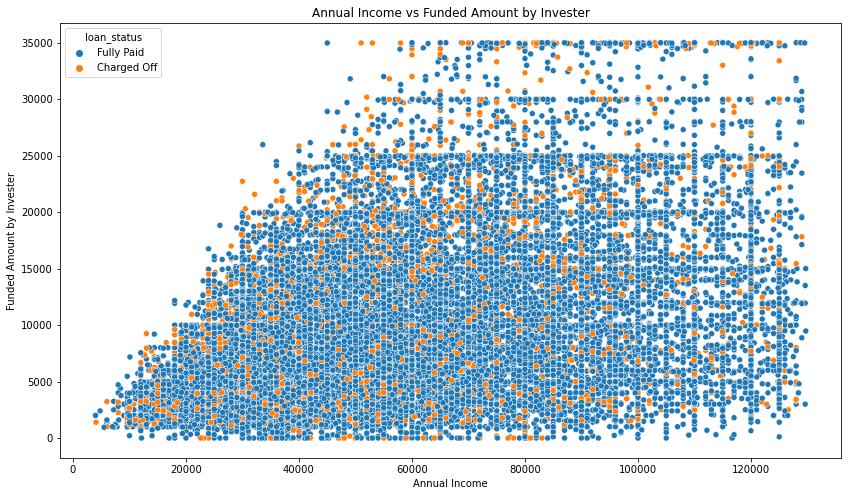

In [62]:
#Annual Income Vs Funded amount by investor

plt.figure(figsize=(14,8))
ax = sns.scatterplot(x='annual_inc', y='funded_amnt_inv', data =loan_data , hue='loan_status')
ax.set_title('Annual Income vs Funded Amount by Invester')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Funded Amount by Invester')
plt.show()

**Observation:** Defaulting rate is higher for lower annual income. 

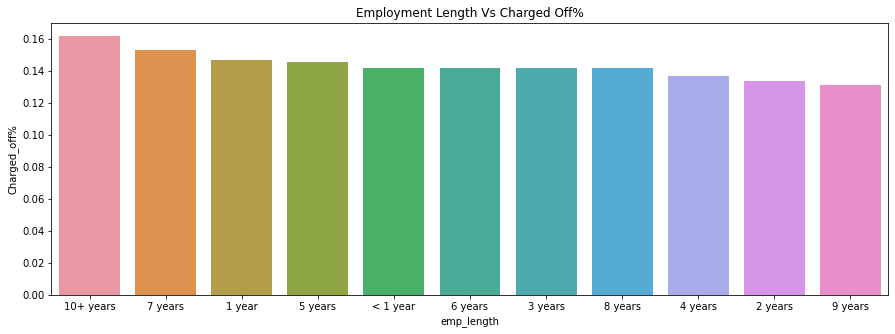

In [63]:
# Employment Length vs Charged Off %
#lets calculate percentage of 'charged off' in the dataframe with respect to employment length.

status_vs_emplen = loan_data.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_emplen['Total'] = status_vs_emplen['Charged Off']+ status_vs_emplen['Fully Paid']
status_vs_emplen['Charged_off%'] = status_vs_emplen['Charged Off']/status_vs_emplen['Total']
status_vs_emplen = status_vs_emplen.sort_values('Charged_off%', ascending = False)

#Ploting the Graph

plt.figure(figsize=(15,5))
ax = sns.barplot(data =status_vs_emplen,x='emp_length', y ='Charged_off%')
ax.set_title('Employment Length Vs Charged Off%')
plt.show()

**Observations:** Defaulting Rate is more for 10+ years of employment length followed by 7 years then 1 year. 

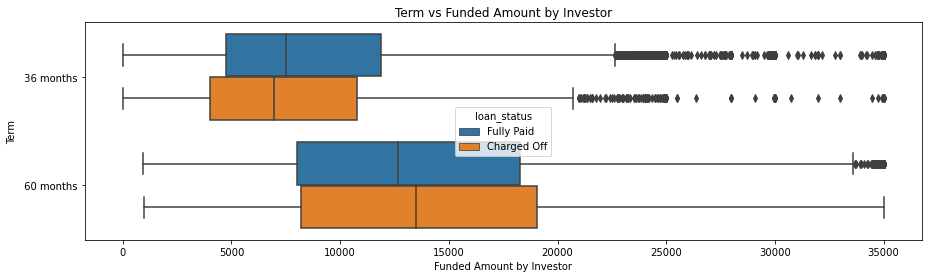

In [64]:
# Term vs Funded Amount by Investor

plt.figure(figsize=(15,4))
ax = sns.boxplot(x='funded_amnt_inv', y='term',hue ='loan_status', data =loan_data)
ax.set_title('Term vs Funded Amount by Investor')
ax.set_xlabel('Funded Amount by Investor')
ax.set_ylabel('Term')
plt.show()

**Observations:** it can be observed that term is 60 months of larger amounts

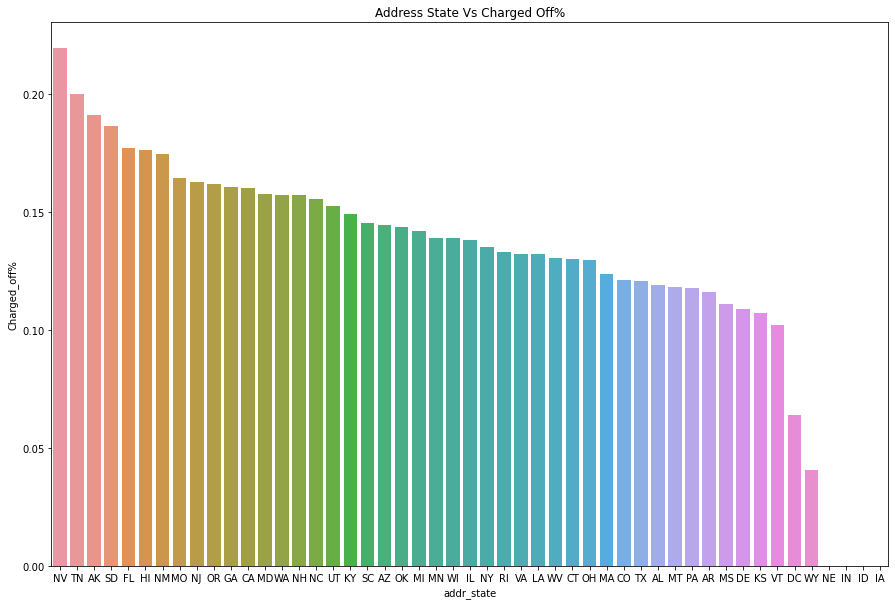

In [65]:
#Address State vs Charged Off %
#lets calculate percentage of 'charged off' in the dataframe with respect to Address State.

status_vs_addr = loan_data.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_addr['Total'] = status_vs_addr['Charged Off']+ status_vs_addr['Fully Paid']
status_vs_addr['Charged_off%'] = status_vs_addr['Charged Off']/status_vs_addr['Total']
status_vs_addr = status_vs_addr.sort_values('Charged_off%', ascending = False)

#Ploting the Graph

plt.figure(figsize=(15,10))
ax = sns.barplot(data =status_vs_addr,x='addr_state', y ='Charged_off%')
ax.set_title('Address State Vs Charged Off%')
plt.show()

**Observations:** Charged off percentage is highest for Nevada.

## Correlation Matrix

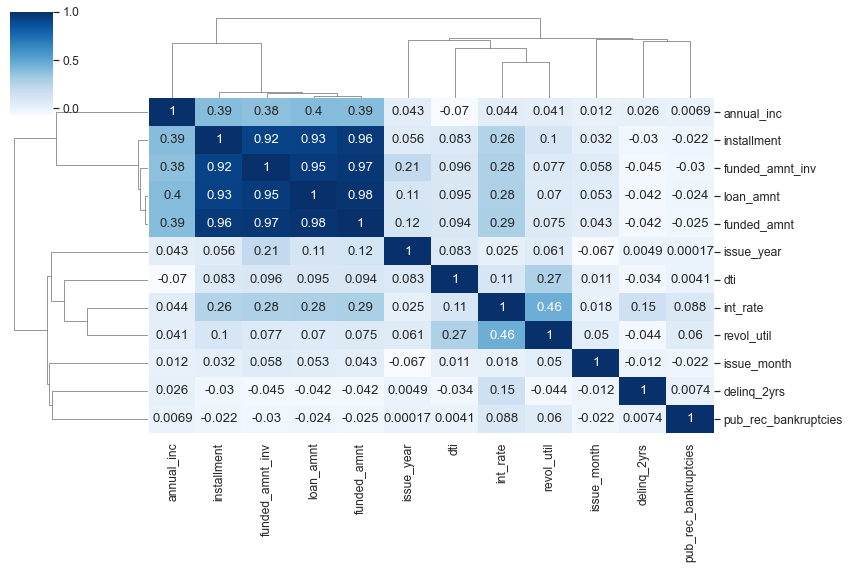

In [66]:
# Correlation Matrix
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64','int32']).columns
numeric_data = loan_data[numeric_columns]

corr = numeric_data.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8),cmap="Blues")
plt.show()

##### Observations:
1. Loan amount, funded amount, investor amount & installment has strong correlation.
2. Debt-to-income ratio with annual income is negetive correlation. Increase in annual income decreases DTI.


## CONCLUSIONS
<pre>
From the above analysis, we can conclude that below variables are the driving factors of default:
    1. Higher Interest Rates
    2. Low grades like F & G
    3. Higher Debt-to-Income Ratio
    4. Higher Revolving Utilization Rate 
    5. Small Business is the purpose
    6. Home ownership is Rent or Mortgage
    7. Lower annual income. 
    
    
Other observations:
    1. Nevada has highest default rate
    2. 60 months term has higher Charged off percentage
    3. Not verified applications have slightly higher default rate compared to verified and source verified.
    4. 10+ years of employment length has most default rate followed by 7 years and 1 years.
    
    
</pre>